## 0. Introduction

The purpose of this notebook is to explore parametric inference with reference to chapters 6 and 9 from *All of Statistics* (Wasserman, 2004) and [this GitHub page](https://github.com/MatthewReid854/reliability/blob/master/docs/How%20does%20Maximum%20Likelihood%20Estimation%20work.rst) (Reid, 2020).

## 1. Parametric and Nonparametric Models

A **statistical model** $\Im$ is a set of distributions (or densities or regression functions). A **parametric model** is a set $\Im$ that can be parameterized by a finite number of parameters. For example, if we assume that the data come from a normal distribution, then the model is

$$
\Im = \left\{ f(x; \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left\{ -\frac{1}{2\sigma^2} (x - \mu)^2 \right\}, \quad \mu \in \mathbb{R}, \sigma > 0 \right\}.
$$

This is a two-parameter model. We have written the density as $f(x; \mu, \sigma)$ to show that $x$ is a value of the random variable whereas $\mu$ and $\sigma$ are parameters.

In general, a parametric model takes the form

$$ \Im = \Bigg\{ f(x; \theta) : \theta \in \Theta \Bigg\} $$

where $\theta$ is an unknown parameter (or vector of parameters) that can take values in the **parameter space** $\Theta$. If $\theta$ is a vector but we are only interested in one component of $\theta$, we call the remaining parameters **nuisance parameters**. A **nonparametric model** is a set $\Im$ that cannot be parameterized by a finite number of parameters.

## 2. Parametric Inference

### 2.1 The Method of Moments

The first method for generating parametric estimators that we will study is called the method of moments. We will see that these estimators are not optimal but they are often easy to compute. They are are also useful as starting values for other methods that require iterative numerical routines.

Suppose that the parameter $\theta = (\theta_1, \ldots, \theta_k)$ has $k$ components. For $1 \le j \le k$, define the $j^\text{th}$ **moment**

$$ \alpha_j \equiv \alpha_j (\theta) = \mathbb{E}_{\theta}(X^j) = \int x^j \, dF_{\theta}(x) $$

and the $j^\text{th}$ **sample moment**

$$ \widehat{\alpha}_j = \frac{1}{n} \sum_{i=1}^{n} X_i^j. $$

The **method of moments estimator** $\widehat{\theta}_n$ is defined to be the value of $\theta$ such that

$$
\begin{aligned}
\alpha_1(\widehat{\theta}_n) &= \hat{\alpha}_1 \\
\alpha_2(\widehat{\theta}_n) &= \hat{\alpha}_2 \\
&\vdots \\
\alpha_k(\widehat{\theta}_n) &= \hat{\alpha}_k.
\end{aligned}
$$

### 2.2 Maximum Likelihood

The most common method for estimating parameters in a parametric model is the **maximum likelihood method**. Let $X_1, \ldots, X_n$ be IID. with PDF $f(x; \theta)$.

The **likelihood function** is defined by

$$ \mathcal{L}_n(\theta) = \prod_{i=1}^{n} f(X_i; \theta). $$

The **log-likelihood function** is defined by $\ell_n(\theta) = \log \mathcal{L}_n(\theta)$.

The likelihood function is just the joint density of the data, except that we **treat it as a function of the parameter** $\theta$. Thus, $\mathcal{L}_n : \Theta \to [0, \infty)$. The likelihood function is not a density function: in general, it is **not** true that $\mathcal{L}_n(\theta)$ integrates to 1 (with respect to $\theta$).

The **maximum likelihood estimator** (MLE), denoted by $\widehat{\theta}_n$, is the value of $\theta$ that maximizes $\mathcal{L}_n(\theta)$.

The maximum of $\ell_n(\theta)$ occurs at the same place as the maximum of $\mathcal{L}_n(\theta)$, so maximizing the log-likelihood leads to the same answer as maximizing the likelihood. Often, it is easier to work with the log-likelihood.

Let's consider an example from Reid (2020). Using the exponential distribution where we have some failure times: $t = [27, 64, 3, 18, 8]$. We need an initial estimate for time model parameter ($\lambda$) which we would typically get using Least Squares Estimation. For this example, lets start with $0.1$ as our first guess for $\lambda$.

For each of these values, we need to calculate the value of the PDF (with the given value of $\lambda$).

Exponential PDF: $f(t) = \lambda e^{-\lambda t}.$

Exponential Log-PDF: $\ln(f(t)) = \ln(\lambda)-\lambda t.$

Now we substitute in $\lambda=0.1$ and $t = [27, 64, 3, 18, 8]$.

$$
\begin{aligned}
\mathcal{L}(\lambda = 0.1 \mid t = [27, 64, 3, 18, 8]) &= \\
& (\ln(0.1) - 0.1 \times 27) + (\ln(0.1) - 0.1 \times 64) + (\ln(0.1) - 0.1 \times 3) \\
& + (\ln(0.1) - 0.1 \times 18) + (\ln(0.1) - 0.1 \times 8) \\
&= -23.512925
\end{aligned}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

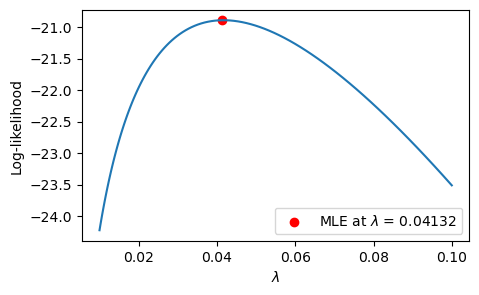

In [2]:
# Solve in python
t = np.array([27, 64, 3, 18, 8])
lambda_array = np.geomspace(0.01, 0.1, 100)
LL = np.zeros(len(lambda_array))

for i, lambda_value in enumerate(lambda_array):
    loglik = np.log(lambda_value) - lambda_value * t
    LL[i] = loglik.sum()

max_LL = LL[np.argmax(LL)]
max_lambda = lambda_array[np.argmax(LL)]

# Plot the log-likelihood over the range of lambda values
plt.figure(figsize=(5,3))
plt.plot(lambda_array, LL)
plt.xlabel('$\lambda$')
plt.ylabel('Log-likelihood')
plt.scatter(max_lambda, max_LL, color='r', label=f'MLE at $\\lambda$ = {max_lambda:.5f}')
plt.legend()
plt.show()